# Classification Dataset

In [22]:
import pandas as pd
import numpy as np

# Define the ranges for each test based on the provided data
ranges = {
    "Hemoglobin (g/dL)": {"min": [13, 12, 10.5], "normal": [15.5, 15, 14], "max": [17, 16, 15]},
    "RBC (million/µL)": {"min": [4.7, 4.2, 4.1], "normal": [5.5, 5, 5.5], "max": [6, 5.5, 6]},
    "WBC (cells/µL)": {"min": [4000, 4000, 5000], "normal": [10000, 10000, 15000], "max": [11000, 11000, 16000]},
    "Hematocrit (%)": {"min": [38, 35, 31], "normal": [50, 45, 44], "max": [52, 47, 46]},
    "Platelet Count (platelets/µL)": {"min": [150000, 150000, 200000], "normal": [450000, 450000, 500000], "max": [500000, 500000, 550000]},
    "Fasting Blood Sugar (mg/dL)": {"min": [70, 70, 70], "normal": [99, 99, 100], "max": [110, 110, 110]},
    "Hemoglobin A1C (%)": {"min": [4, 4, 4], "normal": [5.6, 5.6, 5.5], "max": [6, 6, 6]},
    "Serum Creatinine (mg/dL)": {"min": [0.7, 0.6, 0.2], "normal": [1.3, 1.1, 0.7], "max": [1.5, 1.3, 0.9]},
    "Blood Urea Nitrogen (BUN) (mg/dL)": {"min": [7, 7, 5], "normal": [20, 20, 18], "max": [25, 25, 22]},
    "Glomerular Filtration Rate (GFR) (mL/min/1.73m²)": {"min": [90, 90, 100], "normal": [130, 120, 140], "max": [140, 130, 150]},
    "Alanine Aminotransferase (ALT) (U/L)": {"min": [7, 7, 10], "normal": [56, 56, 45], "max": [60, 60, 50]},
    "Aspartate Aminotransferase (AST) (U/L)": {"min": [10, 10, 15], "normal": [40, 40, 50], "max": [45, 45, 55]},
    "Alkaline Phosphatase (ALP) (U/L)": {"min": [30, 30, 100], "normal": [147, 147, 350], "max": [160, 160, 400]},
    "Total Bilirubin (mg/dL)": {"min": [0.1, 0.1, 0.2], "normal": [1.2, 1.2, 1], "max": [1.5, 1.5, 1.2]},
    "Total Cholesterol (mg/dL)": {"min": [120, 120, 100], "normal": [200, 200, 170], "max": [220, 220, 190]},
    "LDL (mg/dL)": {"min": [50, 50, 50], "normal": [100, 100, 100], "max": [120, 120, 120]},
    "HDL (mg/dL)": {"min": [40, 50, 40], "normal": [60, 60, 70], "max": [70, 70, 80]},
    "Triglycerides (mg/dL)": {"min": [50, 50, 50], "normal": [150, 150, 130], "max": [170, 170, 150]},
    "Sodium (mEq/L)": {"min": [135, 135, 135], "normal": [145, 145, 145], "max": [150, 150, 150]},
    "Potassium (mEq/L)": {"min": [3.5, 3.5, 3.5], "normal": [5.1, 5.1, 5.5], "max": [5.5, 5.5, 6]},
    "Calcium (mg/dL)": {"min": [8.5, 8.5, 9], "normal": [10.5, 10.5, 11], "max": [11, 11, 12]},
    "Iron (µg/dL)": {"min": [50, 40, 30], "normal": [176, 170, 120], "max": [200, 190, 150]},
    "Ferritin (ng/mL)": {"min": [30, 20, 10], "normal": [336, 200, 100], "max": [400, 250, 150]},
    "Urine Protein": {"min": ["Absent", "Absent", "Absent"], "normal": ["Absent", "Absent", "Absent"], "max": ["Trace", "Trace", "Trace"]},
    "Urine Glucose": {"min": ["Absent", "Absent", "Absent"], "normal": ["Absent", "Absent", "Absent"], "max": ["Trace", "Trace", "Trace"]},
    "Red Blood Cells in Urine (cells/HPF)": {"min": [0, 0, 0], "normal": [5, 5, 5], "max": [10, 10, 10]}
}

# Define absolute minimum and maximum values for each test
absolute_ranges = {
    "Hemoglobin (g/dL)": {"abs_min": 5, "abs_max": 30},
    "RBC (million/µL)": {"abs_min": 2, "abs_max": 10},
    "WBC (cells/µL)": {"abs_min": 1000, "abs_max": 50000},
    "Hematocrit (%)": {"abs_min": 20, "abs_max": 70},
    "Platelet Count (platelets/µL)": {"abs_min": 50000, "abs_max": 1000000},
    "Fasting Blood Sugar (mg/dL)": {"abs_min": 50, "abs_max": 600},
    "Hemoglobin A1C (%)": {"abs_min": 3, "abs_max": 20},
    "Serum Creatinine (mg/dL)": {"abs_min": 0.1, "abs_max": 15},
    "Blood Urea Nitrogen (BUN) (mg/dL)": {"abs_min": 5, "abs_max": 100},
    "Glomerular Filtration Rate (GFR) (mL/min/1.73m²)": {"abs_min": 15, "abs_max": 200},
    "Alanine Aminotransferase (ALT) (U/L)": {"abs_min": 5, "abs_max": 500},
    "Aspartate Aminotransferase (AST) (U/L)": {"abs_min": 5, "abs_max": 500},
    "Alkaline Phosphatase (ALP) (U/L)": {"abs_min": 20, "abs_max": 1500},
    "Total Bilirubin (mg/dL)": {"abs_min": 0.1, "abs_max": 50},
    "Total Cholesterol (mg/dL)": {"abs_min": 100, "abs_max": 700},
    "LDL (mg/dL)": {"abs_min": 30, "abs_max": 400},
    "HDL (mg/dL)": {"abs_min": 20, "abs_max": 150},
    "Triglycerides (mg/dL)": {"abs_min": 30, "abs_max": 5000},
    "Sodium (mEq/L)": {"abs_min": 120, "abs_max": 190},
    "Potassium (mEq/L)": {"abs_min": 2.5, "abs_max": 8},
    "Calcium (mg/dL)": {"abs_min": 7, "abs_max": 20},
    "Iron (µg/dL)": {"abs_min": 10, "abs_max": 1000},
    "Ferritin (ng/mL)": {"abs_min": 5, "abs_max": 10000},
    "Urine Protein": {"abs_min": "Absent", "abs_max": "Severe"},
    "Urine Glucose": {"abs_min": "Absent", "abs_max": "Extreme"},
    "Red Blood Cells in Urine (cells/HPF)": {"abs_min": 0, "abs_max": 100}
}

# Define the number of rows
num_rows = 30000

# Define the genders
genders = ["Men", "Women", "Children"]

# Initialize the data dictionary
data = {"Gender": np.random.choice(genders, num_rows)}

# Generate random values for each test
for test, values in ranges.items():
    min_vals = values["min"]
    normal_vals = values["normal"]
    max_vals = values["max"]
    
    # Get absolute min and max for the test
    abs_min = absolute_ranges[test]["abs_min"]
    abs_max = absolute_ranges[test]["abs_max"]
    
    test_data = []
    for i in range(num_rows):
        gender_index = genders.index(data["Gender"][i])  # Get the index of the gender
        if isinstance(min_vals[gender_index], str):
            # For categorical data, choose randomly between min, normal, and max
            test_data.append(np.random.choice([min_vals[gender_index], normal_vals[gender_index], max_vals[gender_index]]))
        else:
            # For numerical data, generate a random value within the range for the specific gender
            rand = np.random.rand()
            if rand < 0.15:  # 25% below normal range
                value = np.random.uniform(abs_min, min_vals[gender_index])  # Below normal, but within absolute min
            elif rand < 0.85:  # 50% within normal range
                value = np.random.uniform(min_vals[gender_index], max_vals[gender_index])  # Within normal range
            else:  # 25% above normal range
                value = np.random.uniform(max_vals[gender_index], abs_max)  # Above normal, but within absolute max
            test_data.append(value)
    data[test] = test_data

# Create a DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("lab_test_values.csv", index=False)

In [23]:
# Define diagnostic thresholds based on medical guidelines

# Diabetes Criteria (American Diabetes Association)
diabetes_conditions = (
    (df["Fasting Blood Sugar (mg/dL)"] >= 126) | 
    (df["Hemoglobin A1C (%)"] >= 6.5) |
    (df["Urine Glucose"] == "Trace") |
    (df["Urine Glucose"] == "Extreme")
)

anemia_conditions = (
    ((df["Gender"] == "Men") & (df["Hemoglobin (g/dL)"] < 13.8)) | 
    ((df["Gender"] == "Women") & (df["Hemoglobin (g/dL)"] < 12.1)) |
    ((df["Gender"] == "Children") & (df["Hemoglobin (g/dL)"] < 10.5)) |

    ((df["Gender"] == "Men") & (df["RBC (million/µL)"] < 4.7)) | 
    ((df["Gender"] == "Women") & (df["RBC (million/µL)"] < 4.2)) |
    ((df["Gender"] == "Children") & (df["RBC (million/µL)"] < 4.1)) |

    ((df["Gender"] == "Men") & (df["Hematocrit (%)"] < 40.7)) | 
    ((df["Gender"] == "Women") & (df["Hematocrit (%)"] < 36.1)) |
    ((df["Gender"] == "Children") & (df["Hematocrit (%)"] < 31)) |

    (df["Iron (µg/dL)"] < 60) | 
    (df["Ferritin (ng/mL)"] < 15)
)

# Kidney Failure Criteria (National Kidney Foundation)
kidney_conditions = (
    ((df["Gender"] == "Men") & (df["Serum Creatinine (mg/dL)"] > 1.35)) | 
    ((df["Gender"] == "Women") & (df["Serum Creatinine (mg/dL)"] > 1.04)) |
    ((df["Gender"] == "Children") & (df["Serum Creatinine (mg/dL)"] > 0.7)) |

    (df["Blood Urea Nitrogen (BUN) (mg/dL)"] > 20) | 
    (df["Glomerular Filtration Rate (GFR) (mL/min/1.73m²)"] < 60) |

    ((df["Urine Protein"] == "Trace") | (df["Urine Protein"] == "Severe")) &
    # Secondary Condition: Elevated Serum Creatinine or Reduced GFR
    (
        # Elevated Serum Creatinine (Gender-specific thresholds)
        ((df["Gender"] == "Men") & (df["Serum Creatinine (mg/dL)"] > 1.35)) | 
        ((df["Gender"] == "Women") & (df["Serum Creatinine (mg/dL)"] > 1.04)) |
        ((df["Gender"] == "Children") & (df["Serum Creatinine (mg/dL)"] > 0.7)) |

        # Reduced Glomerular Filtration Rate (GFR)
        (df["Glomerular Filtration Rate (GFR) (mL/min/1.73m²)"] < 60)
    )|
 
    (df["Urine Protein"] == "Severe")
)

# Liver Failure Criteria (American Liver Foundation)
liver_conditions = (
    ((df["Gender"] == "Men") & (df["Alanine Aminotransferase (ALT) (U/L)"] > 55)) |
    ((df["Gender"] == "Women") & (df["Alanine Aminotransferase (ALT) (U/L)"] > 45)) |
    ((df["Gender"] == "Children") & (df["Alanine Aminotransferase (ALT) (U/L)"] > 35)) |

    ((df["Gender"] == "Men") & (df["Aspartate Aminotransferase (AST) (U/L)"] > 40) & (df["Alanine Aminotransferase (ALT) (U/L)"] > 55)) |
    ((df["Gender"] == "Women") & (df["Aspartate Aminotransferase (AST) (U/L)"] > 32) & (df["Alanine Aminotransferase (ALT) (U/L)"] > 45)) |
    ((df["Gender"] == "Children") & (df["Aspartate Aminotransferase (AST) (U/L)"] > 50) & (df["Alanine Aminotransferase (ALT) (U/L)"] > 35)) |

    ((df["Gender"] == "Men") & (df["Alkaline Phosphatase (ALP) (U/L)"] > 130)) |
    ((df["Gender"] == "Women") & (df["Alkaline Phosphatase (ALP) (U/L)"] > 120)) |
    ((df["Gender"] == "Children") & (df["Alkaline Phosphatase (ALP) (U/L)"] > 400)) |

    ((df["Gender"] == "Men") & (df["Total Bilirubin (mg/dL)"] > 1.2)) |
    ((df["Gender"] == "Women") & (df["Total Bilirubin (mg/dL)"] > 1.2)) |
    ((df["Gender"] == "Children") & (df["Total Bilirubin (mg/dL)"] > 3))
)

# Heart Disease Criteria (American Heart Association)
heart_conditions = (
    (df["Total Cholesterol (mg/dL)"] >= 240) |
    (df["LDL (mg/dL)"] >= 160) |
    ((df["Gender"] == "Men") & (df["HDL (mg/dL)"] < 40)) | 
    ((df["Gender"] == "Women") & (df["HDL (mg/dL)"] < 50)) |
    ((df["Gender"] == "Children") & (df["HDL (mg/dL)"] < 40)) |
    (df["Triglycerides (mg/dL)"] >= 200)
)

# Assign labels (1 for positive, 0 for negative)
df["Diabetes"] = diabetes_conditions.astype(int)
df["Anemia"] = anemia_conditions.astype(int)
df["Kidney Failure"] = kidney_conditions.astype(int)
df["Liver Failure"] = liver_conditions.astype(int)
df["Heart Disease"] = heart_conditions.astype(int)

# Save the updated DataFrame to CSV
df.to_csv("27lab_tests_classificationM.csv", index=False)

In [24]:
df.columns

Index(['Gender', 'Hemoglobin (g/dL)', 'RBC (million/µL)', 'WBC (cells/µL)',
       'Hematocrit (%)', 'Platelet Count (platelets/µL)',
       'Fasting Blood Sugar (mg/dL)', 'Hemoglobin A1C (%)',
       'Serum Creatinine (mg/dL)', 'Blood Urea Nitrogen (BUN) (mg/dL)',
       'Glomerular Filtration Rate (GFR) (mL/min/1.73m²)',
       'Alanine Aminotransferase (ALT) (U/L)',
       'Aspartate Aminotransferase (AST) (U/L)',
       'Alkaline Phosphatase (ALP) (U/L)', 'Total Bilirubin (mg/dL)',
       'Total Cholesterol (mg/dL)', 'LDL (mg/dL)', 'HDL (mg/dL)',
       'Triglycerides (mg/dL)', 'Sodium (mEq/L)', 'Potassium (mEq/L)',
       'Calcium (mg/dL)', 'Iron (µg/dL)', 'Ferritin (ng/mL)', 'Urine Protein',
       'Urine Glucose', 'Red Blood Cells in Urine (cells/HPF)', 'Diabetes',
       'Anemia', 'Kidney Failure', 'Liver Failure', 'Heart Disease'],
      dtype='object')

In [25]:
# Disable scientific notation for all columns
pd.set_option('display.float_format', '{:.2f}'.format)

In [26]:
# Display sample
df.sample(20)

,Gender,Hemoglobin (g/dL),RBC (million/µL),WBC (cells/µL),Hematocrit (%),Platelet Count (platelets/µL),Fasting Blood Sugar (mg/dL),Hemoglobin A1C (%),Serum Creatinine (mg/dL),Blood Urea Nitrogen (BUN) (mg/dL),...,Iron (µg/dL),Ferritin (ng/mL),Urine Protein,Urine Glucose,Red Blood Cells in Urine (cells/HPF),Diabetes,Anemia,Kidney Failure,Liver Failure,Heart Disease
18739,Women,14.50,4.32,1537.09,23.91,367720.94,79.40,4.02,0.79,6.12,...,85.89,132.82,Absent,Trace,1.71,1,1,0,1,0
10966,Children,10.96,5.70,6851.24,40.74,505198.66,98.05,5.55,0.79,5.00,...,44.24,123.96,Trace,Absent,0.80,0,1,1,1,1
15499,Men,15.51,5.41,6622.44,65.14,127649.19,51.09,5.86,0.89,13.62,...,97.11,9.57,Absent,Absent,9.17,0,1,0,1,0
21472,Women,28.73,5.02,8531.41,38.54,90546.56,75.15,5.77,0.47,18.58,...,146.82,9.57,Trace,Trace,7.51,1,1,0,1,0
2557,Children,13.61,3.96,1574.13,29.57,320591.30,76.85,10.08,0.21,5.00,...,73.16,26.67,Trace,Absent,3.41,1,1,0,0,0
21650,Women,25.20,2.61,8596.89,44.73,496134.94,52.98,4.32,13.35,84.27,...,88.00,33.81,Absent,Absent,63.85,0,1,1,1,0
25782,Men,14.06,7.24,10155.05,38.84,92116.09,95.80,5.56,0.89,24.43,...,117.08,167.41,Absent,Absent,6.79,0,1,1,0,0
27130,Children,14.71,5.48,6437.78,41.35,290955.79,89.72,4.84,12.35,9.85,...,133.56,75.16,Absent,Absent,0.00,0,0,1,0,1
2297,Men,14.69,7.42,6578.59,45.57,197161.38,98.83,5.33,1.34,19.52,...,168.69,308.44,Trace,Absent,0.02,0,0,0,0,1
5198,Women,26.90,3.74,6670.83,46.16,354624.04,99.34,4.40,1.01,21.22,...,142.61,204.78,Absent,Trace,9.22,1,1,1,1,1


In [27]:
# Calculate the percentage of all unique values in the column
pD = df["Diabetes"].value_counts(normalize=True) * 100
pA = df["Anemia"].value_counts(normalize=True) * 100
pK = df["Kidney Failure"].value_counts(normalize=True) * 100
pL = df["Liver Failure"].value_counts(normalize=True) * 100
pH = df["Heart Disease"].value_counts(normalize=True) * 100

# Print the result
print(pD,'\n',pA,'\n',pK,'\n',pL,'\n',pH)

Diabetes
1   51.15
0   48.85
Name: proportion, dtype: float64 
 Anemia
1   65.16
0   34.84
Name: proportion, dtype: float64 
 Kidney Failure
1   58.59
0   41.41
Name: proportion, dtype: float64 
 Liver Failure
1   63.31
0   36.69
Name: proportion, dtype: float64 
 Heart Disease
0   54.21
1   45.79
Name: proportion, dtype: float64


In [28]:
from IPython.display import FileLink

# Create a download link
FileLink("27lab_tests_classificationM.csv")

d:\JamaicaProject\Progression\27lab_tests_classificationM.csv

# Progression Datasets

## Diabetes 

In [2]:
import pandas as pd
import numpy as np

# Define constants for the tests
TEST_RANGES = {
    "Oral Glucose Tolerance Test (OGTT)": {
        "absolute_min": 0,
        "absolute_max": 300,
        "normal_ranges": {
            "Male": (70, 140),
            "Female": (70, 140),
            "Male_Old": (70, 160),  # Adjusted for older males
            "Female_Old": (70, 160)  # Adjusted for older females
        }
    },
    "C-Peptide": {
        "absolute_min": 0,
        "absolute_max": 10,
        "normal_ranges": {
            "Male": (0.9, 4.0),
            "Female": (0.9, 4.0),
            "Male_Old": (0.8, 3.5),  # Adjusted for older males
            "Female_Old": (0.8, 3.5)  # Adjusted for older females
        }
    },
    "Microalbuminuria (Urine Albumin)": {
        "absolute_min": 0,
        "absolute_max": 300,
        "normal_ranges": {
            "Male": (0, 30),
            "Female": (0, 30),
            "Male_Old": (0, 40),  # Adjusted for older males
            "Female_Old": (0, 40)  # Adjusted for older females
        }
    }
}

# Generate synthetic data
np.random.seed(42)
num_samples = 20000
healthy_samples = int(num_samples * 0.3)  # 30% healthy
diseased_samples = num_samples - healthy_samples  # 70% diseased

# Split diseased samples into Type 1 and Type 2 (50-50)
type1_samples = diseased_samples // 2
type2_samples = diseased_samples - type1_samples



In [3]:
# Initialize lists to store data
ages = []
genders = []
ogtt_values = []
c_peptide_values = []
microalbuminuria_values = []
disease_progression = []
diabetes_types = []

# Generate healthy individuals (30%)
for _ in range(healthy_samples):
    age = np.random.randint(1, 80)
    gender = np.random.choice(["Male", "Female"])
    is_old = age > 60  # Define "old" as age > 60
    
    # Determine normal range based on age and gender
    ogtt_range = TEST_RANGES["Oral Glucose Tolerance Test (OGTT)"]["normal_ranges"][f"{gender}_Old"] if is_old else TEST_RANGES["Oral Glucose Tolerance Test (OGTT)"]["normal_ranges"][gender]
    c_peptide_range = TEST_RANGES["C-Peptide"]["normal_ranges"][f"{gender}_Old"] if is_old else TEST_RANGES["C-Peptide"]["normal_ranges"][gender]
    microalbuminuria_range = TEST_RANGES["Microalbuminuria (Urine Albumin)"]["normal_ranges"][f"{gender}_Old"] if is_old else TEST_RANGES["Microalbuminuria (Urine Albumin)"]["normal_ranges"][gender]
    
    # Generate test values within the normal range
    ogtt = np.random.uniform(ogtt_range[0], ogtt_range[1])
    c_peptide = np.random.uniform(c_peptide_range[0], c_peptide_range[1])
    microalbuminuria = np.random.uniform(microalbuminuria_range[0], microalbuminuria_range[1])
    
    # Append data
    ages.append(age)
    genders.append(gender)
    ogtt_values.append(ogtt)
    c_peptide_values.append(c_peptide)
    microalbuminuria_values.append(microalbuminuria)
    disease_progression.append(0)  # Healthy individuals have 0% progression
    diabetes_types.append("No Diabetes")  # Healthy individuals have no diabetes

# Generate individuals with Type 1 diabetes (50% of diseased)
for _ in range(type1_samples):
    age = np.random.randint(1, 40)  # Type 1 is more common in younger individuals
    gender = np.random.choice(["Male", "Female"])
    
    # Generate test values for Type 1 diabetes (low C-Peptide)
    ogtt = np.random.uniform(
        TEST_RANGES["Oral Glucose Tolerance Test (OGTT)"]["absolute_min"],
        TEST_RANGES["Oral Glucose Tolerance Test (OGTT)"]["absolute_max"]
    )
    c_peptide = np.random.uniform(0, 1.5)  # Low C-Peptide for Type 1
    microalbuminuria = np.random.uniform(
        TEST_RANGES["Microalbuminuria (Urine Albumin)"]["absolute_min"],
        TEST_RANGES["Microalbuminuria (Urine Albumin)"]["absolute_max"]
    )
    
    # Normalize scores to [0, 1] based on absolute ranges
    ogtt_norm = (ogtt - TEST_RANGES["Oral Glucose Tolerance Test (OGTT)"]["absolute_min"]) / (
        TEST_RANGES["Oral Glucose Tolerance Test (OGTT)"]["absolute_max"] - TEST_RANGES["Oral Glucose Tolerance Test (OGTT)"]["absolute_min"]
    )
    c_peptide_norm = (c_peptide - TEST_RANGES["C-Peptide"]["absolute_min"]) / (
        TEST_RANGES["C-Peptide"]["absolute_max"] - TEST_RANGES["C-Peptide"]["absolute_min"]
    )
    microalbuminuria_norm = (microalbuminuria - TEST_RANGES["Microalbuminuria (Urine Albumin)"]["absolute_min"]) / (
        TEST_RANGES["Microalbuminuria (Urine Albumin)"]["absolute_max"] - TEST_RANGES["Microalbuminuria (Urine Albumin)"]["absolute_min"]
    )
    
    # Calculate disease progression percentage (weighted average)
    progression = (ogtt_norm * 0.5 + c_peptide_norm * 0.3 + microalbuminuria_norm * 0.2) * 100
    
    # Append data
    ages.append(age)
    genders.append(gender)
    ogtt_values.append(ogtt)
    c_peptide_values.append(c_peptide)
    microalbuminuria_values.append(microalbuminuria)
    disease_progression.append(progression)
    diabetes_types.append("Type 1")

# Generate individuals with Type 2 diabetes (50% of diseased)
for _ in range(type2_samples):
    age = np.random.randint(40, 80)  # Type 2 is more common in older individuals
    gender = np.random.choice(["Male", "Female"])
    
    # Generate test values for Type 2 diabetes (normal/high C-Peptide)
    ogtt = np.random.uniform(
        TEST_RANGES["Oral Glucose Tolerance Test (OGTT)"]["absolute_min"],
        TEST_RANGES["Oral Glucose Tolerance Test (OGTT)"]["absolute_max"]
    )
    c_peptide = np.random.uniform(1.5, 10)  # Normal/high C-Peptide for Type 2
    microalbuminuria = np.random.uniform(
        TEST_RANGES["Microalbuminuria (Urine Albumin)"]["absolute_min"],
        TEST_RANGES["Microalbuminuria (Urine Albumin)"]["absolute_max"]
    )
    
    # Normalize scores to [0, 1] based on absolute ranges
    ogtt_norm = (ogtt - TEST_RANGES["Oral Glucose Tolerance Test (OGTT)"]["absolute_min"]) / (
        TEST_RANGES["Oral Glucose Tolerance Test (OGTT)"]["absolute_max"] - TEST_RANGES["Oral Glucose Tolerance Test (OGTT)"]["absolute_min"]
    )
    c_peptide_norm = (c_peptide - TEST_RANGES["C-Peptide"]["absolute_min"]) / (
        TEST_RANGES["C-Peptide"]["absolute_max"] - TEST_RANGES["C-Peptide"]["absolute_min"]
    )
    microalbuminuria_norm = (microalbuminuria - TEST_RANGES["Microalbuminuria (Urine Albumin)"]["absolute_min"]) / (
        TEST_RANGES["Microalbuminuria (Urine Albumin)"]["absolute_max"] - TEST_RANGES["Microalbuminuria (Urine Albumin)"]["absolute_min"]
    )
    
    # Calculate disease progression percentage (weighted average)
    progression = (ogtt_norm * 0.5 + c_peptide_norm * 0.3 + microalbuminuria_norm * 0.2) * 100
    
    # Append data
    ages.append(age)
    genders.append(gender)
    ogtt_values.append(ogtt)
    c_peptide_values.append(c_peptide)
    microalbuminuria_values.append(microalbuminuria)
    disease_progression.append(progression)
    diabetes_types.append("Type 2")

# Create DataFrame
df_D = pd.DataFrame({
    "Age": ages,
    "Gender": genders,
    "Oral Glucose Tolerance Test (OGTT)": ogtt_values,
    "C-Peptide": c_peptide_values,
    "Microalbuminuria (Urine Albumin)": microalbuminuria_values,
    "Disease Progression (%)": disease_progression,
    "Diabetes Type": diabetes_types
})

# Shuffle the dataset
df_D = df_D.sample(frac=1, random_state=42).reset_index(drop=True)

# Save dataset to CSV
df_D.to_csv("diabetes_progression_dataset_with_classification.csv", index=False)


In [4]:
# Display the first few rows of the dataset
df_D.sample(20)

,Age,Gender,Oral Glucose Tolerance Test (OGTT),C-Peptide,Microalbuminuria (Urine Albumin),Disease Progression (%),Diabetes Type
14305,72,Female,119.910302,4.705854,63.849750,38.359262,Type 2
1614,7,Male,79.279858,2.945157,17.254022,0.000000,No Diabetes
12547,26,Female,259.455119,1.320205,171.574188,58.641415,Type 1
8146,59,Male,82.860764,4.204066,48.297102,29.642131,Type 2
8939,72,Female,114.178875,8.780859,283.028397,64.240951,Type 2
10437,64,Female,56.226223,7.254606,10.439295,31.830807,Type 2
6502,36,Female,93.871197,1.481957,24.636006,0.000000,No Diabetes
11088,53,Male,132.271752,3.058720,26.959692,0.000000,No Diabetes
10002,47,Female,121.353528,2.837583,25.620490,0.000000,No Diabetes
15176,51,Male,114.267738,1.297810,17.354775,0.000000,No Diabetes


In [5]:
pD = df_D["Diabetes Type"].value_counts(normalize=True) * 100
pD

Diabetes Type
Type 1         35.0
Type 2         35.0
No Diabetes    30.0
Name: proportion, dtype: float64

## Anemia

In [6]:
import pandas as pd
import numpy as np

# Define constants for the tests
TEST_RANGES = {
    "Total Iron Binding Capacity (TIBC)": {
        "absolute_min": 100,
        "absolute_max": 500,
        "normal_ranges": {
            "Male": (250, 450),
            "Female": (250, 450),
            "Male_Old": (250, 500),  # Adjusted for older males
            "Female_Old": (250, 500)  # Adjusted for older females
        }
    },
    "Vitamin B12": {
        "absolute_min": 100,
        "absolute_max": 2000,
        "normal_ranges": {
            "Male": (200, 900),
            "Female": (200, 900),
            "Male_Old": (150, 900),  # Adjusted for older males
            "Female_Old": (150, 900)  # Adjusted for older females
        }
    },
    "Folate": {
        "absolute_min": 2,
        "absolute_max": 20,
        "normal_ranges": {
            "Male": (4, 20),
            "Female": (4, 20),
            "Male_Old": (4, 20),  # No change for older males
            "Female_Old": (4, 20)  # No change for older females
        }
    },
    "Reticulocyte Count": {
        "absolute_min": 0.5,
        "absolute_max": 2.5,
        "normal_ranges": {
            "Male": (0.5, 1.5),
            "Female": (0.5, 1.5),
            "Male_Old": (0.5, 1.5),  # No change for older males
            "Female_Old": (0.5, 1.5)  # No change for older females
        }
    }
}

# Generate synthetic data
np.random.seed(42)
num_samples = 20000
healthy_samples = int(num_samples * 0.3)  # 30% healthy
diseased_samples = num_samples - healthy_samples  # 70% diseased



In [7]:
# Initialize lists to store data
ages = []
genders = []
tibc_values = []
vitamin_b12_values = []
folate_values = []
reticulocyte_values = []
disease_progression = []

# Generate healthy individuals (30%)
for _ in range(healthy_samples):
    age = np.random.randint(1, 80)
    gender = np.random.choice(["Male", "Female"])
    is_old = age > 60  # Define "old" as age > 60
    
    # Determine normal range based on age and gender
    tibc_range = TEST_RANGES["Total Iron Binding Capacity (TIBC)"]["normal_ranges"][f"{gender}_Old"] if is_old else TEST_RANGES["Total Iron Binding Capacity (TIBC)"]["normal_ranges"][gender]
    vitamin_b12_range = TEST_RANGES["Vitamin B12"]["normal_ranges"][f"{gender}_Old"] if is_old else TEST_RANGES["Vitamin B12"]["normal_ranges"][gender]
    folate_range = TEST_RANGES["Folate"]["normal_ranges"][f"{gender}_Old"] if is_old else TEST_RANGES["Folate"]["normal_ranges"][gender]
    reticulocyte_range = TEST_RANGES["Reticulocyte Count"]["normal_ranges"][f"{gender}_Old"] if is_old else TEST_RANGES["Reticulocyte Count"]["normal_ranges"][gender]
    
    # Generate test values within the normal range
    tibc = np.random.uniform(tibc_range[0], tibc_range[1])
    vitamin_b12 = np.random.uniform(vitamin_b12_range[0], vitamin_b12_range[1])
    folate = np.random.uniform(folate_range[0], folate_range[1])
    reticulocyte = np.random.uniform(reticulocyte_range[0], reticulocyte_range[1])
    
    # Append data
    ages.append(age)
    genders.append(gender)
    tibc_values.append(tibc)
    vitamin_b12_values.append(vitamin_b12)
    folate_values.append(folate)
    reticulocyte_values.append(reticulocyte)
    disease_progression.append(0)  # Healthy individuals have 0% progression

# Generate individuals with disease (70%)
for _ in range(diseased_samples):
    age = np.random.randint(1, 80)
    gender = np.random.choice(["Male", "Female"])
    is_old = age > 60  # Define "old" as age > 60
    
    # Generate test values within the absolute range (may include abnormal values)
    tibc = np.random.uniform(
        TEST_RANGES["Total Iron Binding Capacity (TIBC)"]["absolute_min"],
        TEST_RANGES["Total Iron Binding Capacity (TIBC)"]["absolute_max"]
    )
    vitamin_b12 = np.random.uniform(
        TEST_RANGES["Vitamin B12"]["absolute_min"],
        TEST_RANGES["Vitamin B12"]["absolute_max"]
    )
    folate = np.random.uniform(
        TEST_RANGES["Folate"]["absolute_min"],
        TEST_RANGES["Folate"]["absolute_max"]
    )
    reticulocyte = np.random.uniform(
        TEST_RANGES["Reticulocyte Count"]["absolute_min"],
        TEST_RANGES["Reticulocyte Count"]["absolute_max"]
    )
    
    # Normalize scores to [0, 1] based on absolute ranges
    tibc_norm = (tibc - TEST_RANGES["Total Iron Binding Capacity (TIBC)"]["absolute_min"]) / (
        TEST_RANGES["Total Iron Binding Capacity (TIBC)"]["absolute_max"] - TEST_RANGES["Total Iron Binding Capacity (TIBC)"]["absolute_min"]
    )
    vitamin_b12_norm = (vitamin_b12 - TEST_RANGES["Vitamin B12"]["absolute_min"]) / (
        TEST_RANGES["Vitamin B12"]["absolute_max"] - TEST_RANGES["Vitamin B12"]["absolute_min"]
    )
    folate_norm = (folate - TEST_RANGES["Folate"]["absolute_min"]) / (
        TEST_RANGES["Folate"]["absolute_max"] - TEST_RANGES["Folate"]["absolute_min"]
    )
    reticulocyte_norm = (reticulocyte - TEST_RANGES["Reticulocyte Count"]["absolute_min"]) / (
        TEST_RANGES["Reticulocyte Count"]["absolute_max"] - TEST_RANGES["Reticulocyte Count"]["absolute_min"]
    )
    
    # Calculate disease progression percentage (weighted average)
    progression = (tibc_norm * 0.4 + vitamin_b12_norm * 0.3 + folate_norm * 0.2 + reticulocyte_norm * 0.1) * 100
    
    # Adjust progression based on age and gender
    if is_old:
        progression *= 1.2  # Increase progression by 20% for older individuals
    if gender == "Female":
        progression *= 1.1  # Increase progression by 10% for females (due to menstruation, pregnancy, etc.)
    
    # Append data
    ages.append(age)
    genders.append(gender)
    tibc_values.append(tibc)
    vitamin_b12_values.append(vitamin_b12)
    folate_values.append(folate)
    reticulocyte_values.append(reticulocyte)
    disease_progression.append(progression)

# Create DataFrame
df_A = pd.DataFrame({
    "Age": ages,
    "Gender": genders,
    "Total Iron Binding Capacity (TIBC)": tibc_values,
    "Vitamin B12": vitamin_b12_values,
    "Folate": folate_values,
    "Reticulocyte Count": reticulocyte_values,
    "Disease Progression (%)": disease_progression
})

# Shuffle the dataset
df_A = df_A.sample(frac=1, random_state=42).reset_index(drop=True)

# Save dataset to CSV
df_A.to_csv("anemia_progression_dataset.csv", index=False)


In [8]:
df_A.sample(20)

,Age,Gender,Total Iron Binding Capacity (TIBC),Vitamin B12,Folate,Reticulocyte Count,Disease Progression (%)
3546,43,Male,299.063472,1464.969632,11.428908,1.217142,55.520776
5320,70,Female,308.621002,510.486021,12.829260,1.131775,0.000000
1513,31,Male,400.229674,612.845721,16.306989,0.928854,0.000000
14510,64,Male,425.631059,1216.511213,10.397117,2.003919,80.450345
16397,57,Male,197.368272,592.039565,9.767637,1.717131,32.222237
9174,9,Female,105.721142,442.538355,6.972825,2.144271,21.700063
18919,65,Female,287.139755,1928.901205,14.471955,1.348970,86.716003
19724,41,Female,433.600840,1526.632506,16.347744,2.235802,88.557489
8698,44,Female,235.582231,1453.986326,15.004082,1.767422,61.295349
19429,23,Female,264.251667,797.980643,16.506167,0.603513,0.000000


## Kidney 

In [9]:
import pandas as pd
import numpy as np

# Define constants for the tests
TEST_RANGES = {
    "24-hour Urine Protein": {
        "absolute_min": 0,
        "absolute_max": 1000,
        "normal_ranges": {
            "Male": (0, 150),
            "Female": (0, 150),
            "Male_Old": (0, 200),  # Adjusted for older males
            "Female_Old": (0, 200)  # Adjusted for older females
        }
    },
    "Serum Uric Acid": {
        "absolute_min": 1,
        "absolute_max": 12,
        "normal_ranges": {
            "Male": (3.5, 7.2),
            "Female": (2.5, 6.0),  # Lower range for females
            "Male_Old": (4.0, 8.0),  # Adjusted for older males
            "Female_Old": (3.0, 7.0)  # Adjusted for older females
        }
    },
    "Serum Creatinine": {
        "absolute_min": 0.5,
        "absolute_max": 10,
        "normal_ranges": {
            "Male": (0.6, 1.2),  # Normal range for males
            "Female": (0.5, 1.1),  # Normal range for females
            "Male_Old": (0.7, 1.3),  # Adjusted for older males
            "Female_Old": (0.6, 1.2)  # Adjusted for older females
        }
    },
    "Glomerular Filtration Rate (GFR)": {
        "absolute_min": 15,
        "absolute_max": 120,
        "normal_ranges": {
            "Male": (90, 120),  # Normal range for males
            "Female": (80, 110),  # Normal range for females
            "Male_Old": (60, 90),  # Adjusted for older males
            "Female_Old": (50, 80)  # Adjusted for older females
        }
    },
    "Blood Urea Nitrogen (BUN)": {
        "absolute_min": 5,
        "absolute_max": 50,
        "normal_ranges": {
            "Male": (7, 20),  # Normal range for males
            "Female": (6, 18),  # Normal range for females
            "Male_Old": (8, 25),  # Adjusted for older males
            "Female_Old": (7, 22)  # Adjusted for older females
        }
    }
}



In [10]:
# Generate synthetic data
np.random.seed(42)
num_samples = 20000
healthy_samples = int(num_samples * 0.3)  # 30% healthy
diseased_samples = num_samples - healthy_samples  # 70% diseased

# Initialize lists to store data
ages = []
genders = []
urine_protein_values = []
uric_acid_values = []
creatinine_values = []
gfr_values = []
bun_values = []
disease_progression = []

# Generate healthy individuals (30%)
for _ in range(healthy_samples):
    age = np.random.randint(1, 80)
    gender = np.random.choice(["Male", "Female"])
    is_old = age > 60  # Define "old" as age > 60
    
    # Determine normal range based on age and gender
    urine_protein_range = TEST_RANGES["24-hour Urine Protein"]["normal_ranges"][f"{gender}_Old"] if is_old else TEST_RANGES["24-hour Urine Protein"]["normal_ranges"][gender]
    uric_acid_range = TEST_RANGES["Serum Uric Acid"]["normal_ranges"][f"{gender}_Old"] if is_old else TEST_RANGES["Serum Uric Acid"]["normal_ranges"][gender]
    creatinine_range = TEST_RANGES["Serum Creatinine"]["normal_ranges"][f"{gender}_Old"] if is_old else TEST_RANGES["Serum Creatinine"]["normal_ranges"][gender]
    gfr_range = TEST_RANGES["Glomerular Filtration Rate (GFR)"]["normal_ranges"][f"{gender}_Old"] if is_old else TEST_RANGES["Glomerular Filtration Rate (GFR)"]["normal_ranges"][gender]
    bun_range = TEST_RANGES["Blood Urea Nitrogen (BUN)"]["normal_ranges"][f"{gender}_Old"] if is_old else TEST_RANGES["Blood Urea Nitrogen (BUN)"]["normal_ranges"][gender]
    
    # Generate test values within the normal range
    urine_protein = np.random.uniform(urine_protein_range[0], urine_protein_range[1])
    uric_acid = np.random.uniform(uric_acid_range[0], uric_acid_range[1])
    creatinine = np.random.uniform(creatinine_range[0], creatinine_range[1])
    gfr = np.random.uniform(gfr_range[0], gfr_range[1])
    bun = np.random.uniform(bun_range[0], bun_range[1])
    
    # Append data
    ages.append(age)
    genders.append(gender)
    urine_protein_values.append(urine_protein)
    uric_acid_values.append(uric_acid)
    creatinine_values.append(creatinine)
    gfr_values.append(gfr)
    bun_values.append(bun)
    disease_progression.append(0)  # Healthy individuals have 0% progression

# Generate individuals with disease (70%)
for _ in range(diseased_samples):
    age = np.random.randint(1, 80)
    gender = np.random.choice(["Male", "Female"])
    is_old = age > 60  # Define "old" as age > 60
    
    # Generate test values within the absolute range (may include abnormal values)
    urine_protein = np.random.uniform(
        TEST_RANGES["24-hour Urine Protein"]["absolute_min"],
        TEST_RANGES["24-hour Urine Protein"]["absolute_max"]
    )
    uric_acid = np.random.uniform(
        TEST_RANGES["Serum Uric Acid"]["absolute_min"],
        TEST_RANGES["Serum Uric Acid"]["absolute_max"]
    )
    creatinine = np.random.uniform(
        TEST_RANGES["Serum Creatinine"]["absolute_min"],
        TEST_RANGES["Serum Creatinine"]["absolute_max"]
    )
    gfr = np.random.uniform(
        TEST_RANGES["Glomerular Filtration Rate (GFR)"]["absolute_min"],
        TEST_RANGES["Glomerular Filtration Rate (GFR)"]["absolute_max"]
    )
    bun = np.random.uniform(
        TEST_RANGES["Blood Urea Nitrogen (BUN)"]["absolute_min"],
        TEST_RANGES["Blood Urea Nitrogen (BUN)"]["absolute_max"]
    )
    
    # Normalize scores to [0, 1] based on absolute ranges
    urine_protein_norm = (urine_protein - TEST_RANGES["24-hour Urine Protein"]["absolute_min"]) / (
        TEST_RANGES["24-hour Urine Protein"]["absolute_max"] - TEST_RANGES["24-hour Urine Protein"]["absolute_min"]
    )
    uric_acid_norm = (uric_acid - TEST_RANGES["Serum Uric Acid"]["absolute_min"]) / (
        TEST_RANGES["Serum Uric Acid"]["absolute_max"] - TEST_RANGES["Serum Uric Acid"]["absolute_min"]
    )
    creatinine_norm = (creatinine - TEST_RANGES["Serum Creatinine"]["absolute_min"]) / (
        TEST_RANGES["Serum Creatinine"]["absolute_max"] - TEST_RANGES["Serum Creatinine"]["absolute_min"]
    )
    gfr_norm = (gfr - TEST_RANGES["Glomerular Filtration Rate (GFR)"]["absolute_min"]) / (
        TEST_RANGES["Glomerular Filtration Rate (GFR)"]["absolute_max"] - TEST_RANGES["Glomerular Filtration Rate (GFR)"]["absolute_min"]
    )
    bun_norm = (bun - TEST_RANGES["Blood Urea Nitrogen (BUN)"]["absolute_min"]) / (
        TEST_RANGES["Blood Urea Nitrogen (BUN)"]["absolute_max"] - TEST_RANGES["Blood Urea Nitrogen (BUN)"]["absolute_min"]
    )
    
    # Calculate disease progression percentage (weighted average)
    progression = (
        urine_protein_norm * 0.4 +
        uric_acid_norm * 0.2 +
        creatinine_norm * 0.2 +
        gfr_norm * 0.1 +
        bun_norm * 0.1
    ) * 100
    
    # Adjust progression based on age and gender
    if is_old:
        progression *= 1.2  # Increase progression by 20% for older individuals
    if gender == "Male":
        progression *= 1.1  # Increase progression by 10% for males
    
    # Append data
    ages.append(age)
    genders.append(gender)
    urine_protein_values.append(urine_protein)
    uric_acid_values.append(uric_acid)
    creatinine_values.append(creatinine)
    gfr_values.append(gfr)
    bun_values.append(bun)
    disease_progression.append(progression)

# Create DataFrame
df_k = pd.DataFrame({
    "Age": ages,
    "Gender": genders,
    "24-hour Urine Protein": urine_protein_values,
    "Serum Uric Acid": uric_acid_values,
    "Serum Creatinine": creatinine_values,
    "Glomerular Filtration Rate (GFR)": gfr_values,
    "Blood Urea Nitrogen (BUN)": bun_values,
    "Disease Progression (%)": disease_progression
})

# Shuffle the dataset
df_k = df_k.sample(frac=1, random_state=42).reset_index(drop=True)

# Save dataset to CSV
df_k.to_csv("kidney_disease_progression_dataset.csv", index=False)



In [11]:
df_k.sample(20)

,Age,Gender,24-hour Urine Protein,Serum Uric Acid,Serum Creatinine,Glomerular Filtration Rate (GFR),Blood Urea Nitrogen (BUN),Disease Progression (%)
5326,8,Female,557.171823,10.543656,5.383997,105.570458,29.951780,64.091672
18451,4,Male,847.267196,2.344025,1.651655,79.105484,34.592556,56.584346
11625,76,Female,167.304397,4.489428,0.873245,70.961842,8.018271,0.000000
18813,1,Female,911.521978,2.456132,1.288454,21.282652,41.270305,49.426710
7017,29,Male,308.590371,1.159892,2.904978,22.314260,30.487161,26.463634
18470,51,Male,270.495572,9.377359,6.712216,98.281848,38.616553,59.984853
9098,60,Female,133.900757,5.361052,0.705090,87.782703,10.556309,0.000000
4922,65,Male,85.295967,6.590703,0.878683,78.990099,23.517472,0.000000
14781,10,Female,787.716138,5.080619,5.360163,70.909188,31.254629,60.318922
14458,52,Female,130.018033,3.879862,1.054929,105.432749,10.519678,0.000000


# **Heart Disease**

In [12]:
import numpy as np
import pandas as pd

# Define normal and absolute ranges
TEST_RANGES = {
    "LDL": {"absolute_min": 50, "absolute_max": 250, "normal_range": (70, 190)},
    "HDL": {"absolute_min": 20, "absolute_max": 100, "normal_range": (40, 90)},
    "Triglycerides": {"absolute_min": 50, "absolute_max": 500, "normal_range": (50, 200)},
    "CRP": {"absolute_min": 0.1, "absolute_max": 15, "normal_range": (0.1, 3)},
    "ECG": {"categories": [0, 1, 2]},
    "Blood Pressure": {"absolute_min": 80, "absolute_max": 220, "normal_range": (90, 140)},
    "Cholesterol": {"absolute_min": 100, "absolute_max": 400, "normal_range": (150, 240)},
    "Troponin": {"absolute_min": 0, "absolute_max": 10, "normal_range": (0, 0.4)},
    "BNP": {"absolute_min": 5, "absolute_max": 2000, "normal_range": (5, 100)},
}

# Generate synthetic data
np.random.seed(42)
n_samples = 20000
healthy_samples = int(n_samples * 0.3)
diseased_samples = n_samples - healthy_samples

ages, genders, ldls, hdls, triglycerides, crps, ecgs = [], [], [], [], [], [], []
bps, cholesterols, troponins, bnps, disease_progression = [], [], [], [], []

# Generate healthy individuals
for _ in range(healthy_samples):
    age = np.random.randint(30, 90)
    gender = np.random.choice(["Male", "Female"])
    is_old = age > 60
    
    # Generate normal values
    ldl = np.random.uniform(*TEST_RANGES["LDL"]["normal_range"])
    hdl = np.random.uniform(*TEST_RANGES["HDL"]["normal_range"])
    triglyceride = np.random.uniform(*TEST_RANGES["Triglycerides"]["normal_range"])
    crp = np.random.uniform(*TEST_RANGES["CRP"]["normal_range"])
    ecg = 0  # Normal ECG
    bp = np.random.uniform(*TEST_RANGES["Blood Pressure"]["normal_range"])
    cholesterol = np.random.uniform(*TEST_RANGES["Cholesterol"]["normal_range"])
    troponin = np.random.uniform(*TEST_RANGES["Troponin"]["normal_range"])
    bnp = np.random.uniform(*TEST_RANGES["BNP"]["normal_range"])
    
    # Append data
    ages.append(age)
    genders.append(gender)
    ldls.append(ldl)
    hdls.append(hdl)
    triglycerides.append(triglyceride)
    crps.append(crp)
    ecgs.append(ecg)
    bps.append(bp)
    cholesterols.append(cholesterol)
    troponins.append(troponin)
    bnps.append(bnp)
    disease_progression.append(0)  # 0% progression for healthy individuals

# Generate diseased individuals
for _ in range(diseased_samples):
    age = np.random.randint(30, 90)
    gender = np.random.choice(["Male", "Female"])
    is_old = age > 60
    
    # Generate abnormal values
    ldl = np.random.uniform(TEST_RANGES["LDL"]["absolute_min"], TEST_RANGES["LDL"]["absolute_max"])
    hdl = np.random.uniform(TEST_RANGES["HDL"]["absolute_min"], TEST_RANGES["HDL"]["absolute_max"])
    triglyceride = np.random.uniform(TEST_RANGES["Triglycerides"]["absolute_min"], TEST_RANGES["Triglycerides"]["absolute_max"])
    crp = np.random.uniform(TEST_RANGES["CRP"]["absolute_min"], TEST_RANGES["CRP"]["absolute_max"])
    ecg = np.random.choice(TEST_RANGES["ECG"]["categories"], p=[0.7, 0.2, 0.1])
    bp = np.random.uniform(TEST_RANGES["Blood Pressure"]["absolute_min"], TEST_RANGES["Blood Pressure"]["absolute_max"])
    cholesterol = np.random.uniform(TEST_RANGES["Cholesterol"]["absolute_min"], TEST_RANGES["Cholesterol"]["absolute_max"])
    troponin = np.random.uniform(TEST_RANGES["Troponin"]["absolute_min"], TEST_RANGES["Troponin"]["absolute_max"])
    bnp = np.random.uniform(TEST_RANGES["BNP"]["absolute_min"], TEST_RANGES["BNP"]["absolute_max"])
    
    # Normalize and calculate progression
    progression = (
        (ldl - 50) / 200 * 0.2 + (1 - (hdl - 20) / 80) * 0.2 +
        (triglyceride - 50) / 450 * 0.15 + (crp - 0.1) / 14.9 * 0.15 +
        ecg * 0.1 + (bp - 80) / 140 * 0.1 + (cholesterol - 100) / 300 * 0.05 +
        (troponin - 0) / 10 * 0.025 + (bnp - 5) / 1995 * 0.025
    ) * 100
    
    # Adjust for age and gender
    if is_old:
        progression *= 1.2
    if gender == "Female":
        progression *= 1.1
    
    # Append data
    ages.append(age)
    genders.append(gender)
    ldls.append(ldl)
    hdls.append(hdl)
    triglycerides.append(triglyceride)
    crps.append(crp)
    ecgs.append(ecg)
    bps.append(bp)
    cholesterols.append(cholesterol)
    troponins.append(troponin)
    bnps.append(bnp)
    disease_progression.append(min(progression, 100))

# Create DataFrame
df_h = pd.DataFrame({
    "Age": ages,
    "Gender": genders,
    "LDL": ldls,
    "HDL": hdls,
    "Triglycerides": triglycerides,
    "CRP": crps,
    "ECG": ecgs,
    "Blood Pressure": bps,
    "Cholesterol": cholesterols,
    "Troponin": troponins,
    "BNP": bnps,
    "Heart Disease Progression (%)": disease_progression
})

# Shuffle dataset and save
df_h = df_h.sample(frac=1, random_state=42).reset_index(drop=True)

df_h.to_csv("heart_disease_progression_dataset.csv", index=False)


In [13]:
df_h.sample(20)

,Age,Gender,LDL,HDL,Triglycerides,CRP,ECG,Blood Pressure,Cholesterol,Troponin,BNP,Heart Disease Progression (%)
8198,85,Male,61.702201,40.990568,454.199657,11.911647,0,103.676549,347.541003,5.528638,1721.377812,60.764033
15989,75,Female,207.300961,53.975449,293.550712,0.687083,1,167.929110,175.205561,6.761138,423.580149,73.516755
13764,33,Female,142.211702,42.151269,395.659664,14.558216,0,187.161424,196.381117,7.580316,1930.390636,69.662100
16584,33,Male,76.962601,75.156445,117.634028,12.918928,0,160.748098,260.297598,0.412471,1678.375240,34.706004
17647,73,Female,142.772537,26.785096,204.177599,2.907433,0,126.125107,385.576301,5.943390,1347.173143,61.734462
8075,41,Female,219.887143,45.223401,206.928367,9.757374,0,171.149764,196.143724,8.958207,829.102698,62.723488
15050,86,Female,100.375427,97.576048,432.895899,12.023011,0,98.866043,350.492365,6.313530,1086.357473,51.302688
4890,86,Male,86.562696,30.377409,358.243107,3.519113,2,193.807421,345.873679,0.488279,487.118232,81.278366
19111,37,Male,203.306891,92.002300,472.822623,3.403576,2,162.683727,310.969913,6.676787,1723.378804,67.994648
14597,43,Male,238.798608,73.248939,320.971793,4.708450,0,203.854920,212.657797,2.420537,964.510356,51.771337


# **Liver**

In [14]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
num_samples = 20000
healthy_samples = int(num_samples * 0.3)  # 30% healthy

genders = []
ages = []
pt_inr_values = []
ggt_values = []
ammonia_values = []
bilirubin_values = []
albumin_values = []
creatinine_values = []
alt_values = []
ast_values = []
platelet_values = []
disease_progression = []

# Define test value ranges
TEST_RANGES = {
    "PT_INR": (0.8, 2.5),
    "GGT": (5, 100),
    "Ammonia": (10, 80),
    "Bilirubin": (0.1, 3.0),
    "Albumin": (2.5, 5.5),
    "Creatinine": (0.5, 2.0),
    "ALT": (5, 70),
    "AST": (5, 60),
    "Platelet_Count": (100000, 450000)
}

# Generate healthy individuals (30%)
for _ in range(healthy_samples):
    gender = np.random.choice(["Male", "Female"])
    age = np.random.randint(30, 91)
    
    pt_inr = np.random.uniform(0.8, 1.3)
    ggt = np.random.uniform(10, 50) if gender == "Female" else np.random.uniform(15, 70)
    ammonia = np.random.uniform(10, 40)
    bilirubin = np.random.uniform(0.1, 1.5)
    albumin = np.random.uniform(3.5, 5.2)
    creatinine = np.random.uniform(0.5, 1.2)
    alt = np.random.uniform(7, 40) if gender == "Female" else np.random.uniform(10, 55)
    ast = np.random.uniform(5, 35) if gender == "Female" else np.random.uniform(10, 40)
    platelet_count = np.random.uniform(180000, 420000) if gender == "Female" else np.random.uniform(150000, 450000)
    
    genders.append(gender)
    ages.append(age)
    pt_inr_values.append(pt_inr)
    ggt_values.append(ggt)
    ammonia_values.append(ammonia)
    bilirubin_values.append(bilirubin)
    albumin_values.append(albumin)
    creatinine_values.append(creatinine)
    alt_values.append(alt)
    ast_values.append(ast)
    platelet_values.append(platelet_count)
    disease_progression.append(0)  # Healthy individuals have 0% progression

# Generate diseased individuals (70%)
for _ in range(num_samples - healthy_samples):
    gender = np.random.choice(["Male", "Female"])
    age = np.random.randint(30, 91)
    
    pt_inr = np.random.uniform(*TEST_RANGES["PT_INR"])
    ggt = np.random.uniform(*TEST_RANGES["GGT"])
    ammonia = np.random.uniform(*TEST_RANGES["Ammonia"])
    bilirubin = np.random.uniform(*TEST_RANGES["Bilirubin"])
    albumin = np.random.uniform(*TEST_RANGES["Albumin"])
    creatinine = np.random.uniform(*TEST_RANGES["Creatinine"])
    alt = np.random.uniform(*TEST_RANGES["ALT"])
    ast = np.random.uniform(*TEST_RANGES["AST"])
    platelet_count = np.random.uniform(*TEST_RANGES["Platelet_Count"])
    
    # Normalize scores to [0, 1]
    pt_inr_norm = (pt_inr - TEST_RANGES["PT_INR"][0]) / (TEST_RANGES["PT_INR"][1] - TEST_RANGES["PT_INR"][0])
    bilirubin_norm = (bilirubin - TEST_RANGES["Bilirubin"][0]) / (TEST_RANGES["Bilirubin"][1] - TEST_RANGES["Bilirubin"][0])
    albumin_norm = 1 - ((albumin - TEST_RANGES["Albumin"][0]) / (TEST_RANGES["Albumin"][1] - TEST_RANGES["Albumin"][0]))
    creatinine_norm = (creatinine - TEST_RANGES["Creatinine"][0]) / (TEST_RANGES["Creatinine"][1] - TEST_RANGES["Creatinine"][0])
    platelet_norm = 1 - ((platelet_count - TEST_RANGES["Platelet_Count"][0]) / (TEST_RANGES["Platelet_Count"][1] - TEST_RANGES["Platelet_Count"][0]))
    
    # Compute disease progression
    progression = (pt_inr_norm * 0.25 + bilirubin_norm * 0.2 + albumin_norm * 0.2 + 
                   creatinine_norm * 0.15 + platelet_norm * 0.2) * 100
    progression = np.clip(progression, 5, 100)
    
    genders.append(gender)
    ages.append(age)
    pt_inr_values.append(pt_inr)
    ggt_values.append(ggt)
    ammonia_values.append(ammonia)
    bilirubin_values.append(bilirubin)
    albumin_values.append(albumin)
    creatinine_values.append(creatinine)
    alt_values.append(alt)
    ast_values.append(ast)
    platelet_values.append(platelet_count)
    disease_progression.append(progression)

# Create DataFrame
df_liver = pd.DataFrame({
    "Gender": genders,
    "Age": ages,
    "PT_INR": pt_inr_values,
    "GGT": ggt_values,
    "Ammonia": ammonia_values,
    "Bilirubin": bilirubin_values,
    "Albumin": albumin_values,
    "Creatinine": creatinine_values,
    "ALT": alt_values,
    "AST": ast_values,
    "Platelet_Count": platelet_values,
    "Disease Progression (%)": disease_progression
})

# Shuffle dataset
df_liver = df_liver.sample(frac=1, random_state=42).reset_index(drop=True)
df_liver
# Save dataset
df_liver.to_csv("liver_disease_progression_dataset.csv", index=False)


In [15]:
df_liver.sample(20)

,Gender,Age,PT_INR,GGT,Ammonia,Bilirubin,Albumin,Creatinine,ALT,AST,Platelet_Count,Disease Progression (%)
2657,Male,49,1.280258,60.220850,14.201050,0.107309,4.024599,0.841976,42.946745,29.831451,243856.851423,0.000000
658,Male,32,1.179431,92.673772,30.756164,1.659898,3.007368,1.433562,15.186890,9.628416,272076.770117,52.457990
15751,Female,58,1.104172,39.593365,20.632833,0.752505,3.609162,0.917963,18.761434,18.005709,281424.148307,0.000000
18641,Female,78,1.775208,5.920561,52.444626,0.433562,2.734203,1.544092,50.515246,53.945153,101183.164118,65.453682
2793,Female,74,1.663616,53.039075,35.797667,0.549729,3.650112,1.239433,54.497987,16.827123,250430.119358,46.932725
3327,Male,52,2.457381,94.306465,58.752972,1.709376,4.414006,1.783518,5.457292,28.554047,277300.080992,65.416105
7629,Female,42,1.226815,19.677109,36.288770,0.126661,4.745173,1.153179,28.687523,18.170877,190771.443953,0.000000
18355,Male,47,1.127316,17.698210,13.108116,0.280022,3.655404,0.624764,40.981951,34.925118,272644.167022,0.000000
1934,Female,78,1.238277,15.949338,27.465192,1.336383,3.876260,0.788410,19.465155,7.676614,281644.144991,0.000000
6953,Male,32,2.181930,59.401378,26.236980,1.993730,3.768496,1.673073,66.941828,23.554481,109402.731951,76.119496


# **Heat Maps**

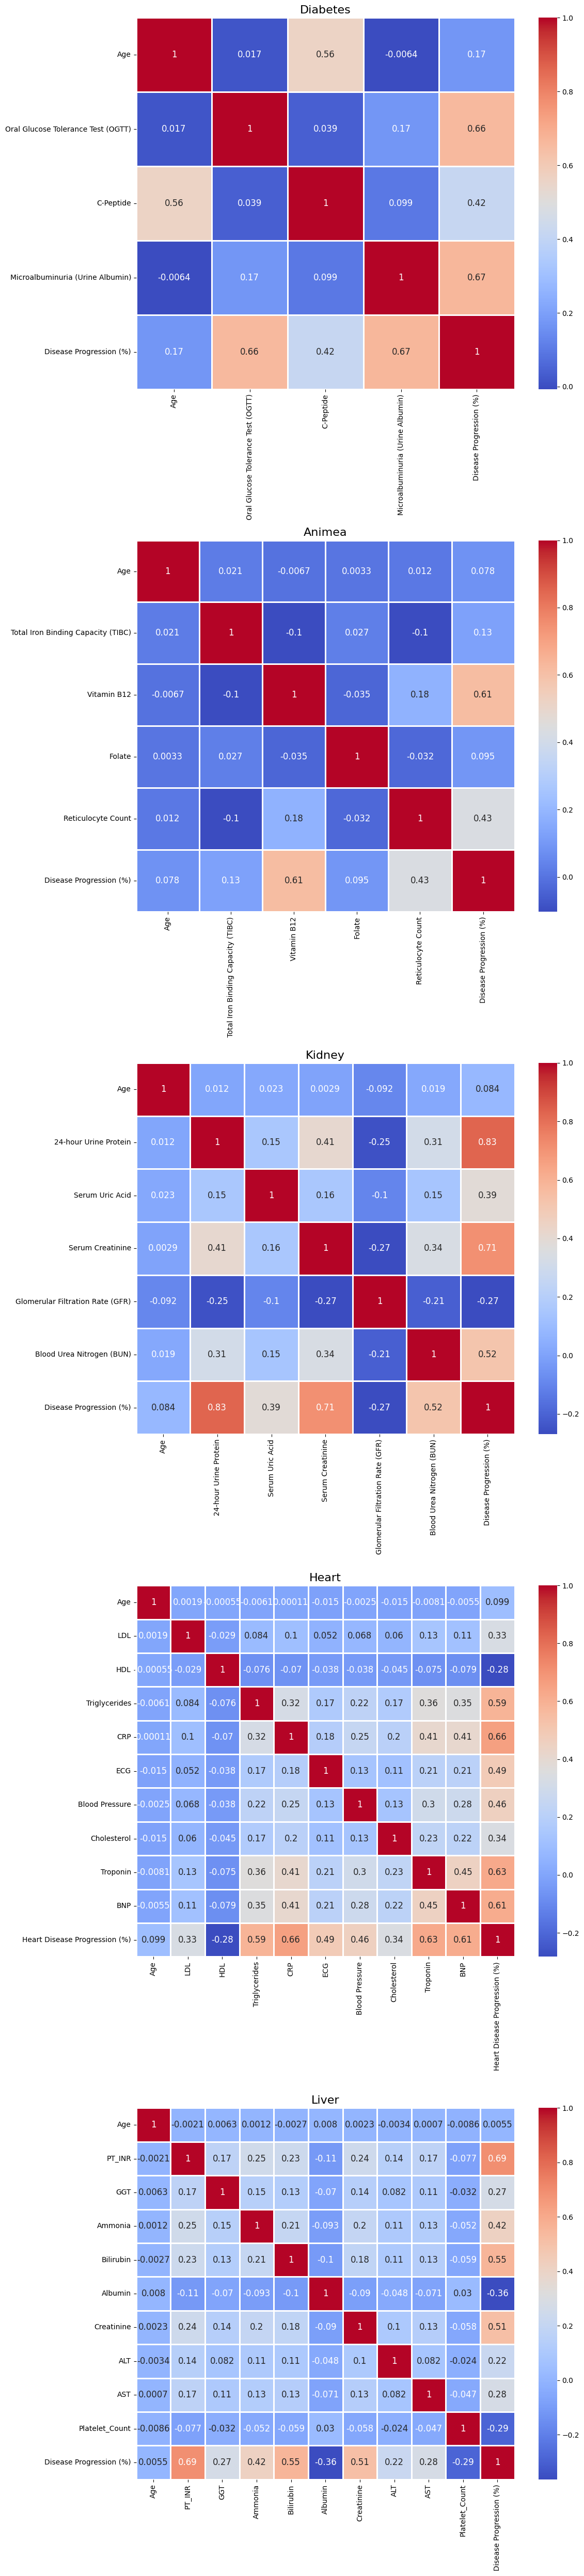

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Define datasets in a list
datasets = [df_D, df_A, df_k, df_h, df_liver]
titles = ["Diabetes", "Animea", "Kidney", "Heart", "Liver"]

# Create subplots
# Create subplots
fig, axes = plt.subplots(5, 1, figsize=(12, 50))  # Taller figure for better visibility

for i, (df, title) in enumerate(zip(datasets, titles)):
    # One-hot encode 'Gender' column if it exists
    if 'Gender' in df.columns:
        df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
    
    # Select only numeric columns
    df_numeric = df.select_dtypes(include=['number'])  
    
    # Compute correlation matrix
    correlation_matrix = df_numeric.corr()  
    
    # Plot heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", ax=axes[i], 
                annot_kws={"size": 12}, cbar=True, linewidths=1)  # Larger font and thicker lines
    axes[i].set_title(title, fontsize=16)  # Larger title font size

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()